
## **Introduction**
Understanding the factors affecting the pricing of cars is crucial in the market. The dataset below contains different features that affect the price of a car. According to the data, a Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.


### **Business Goal**
I aim to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

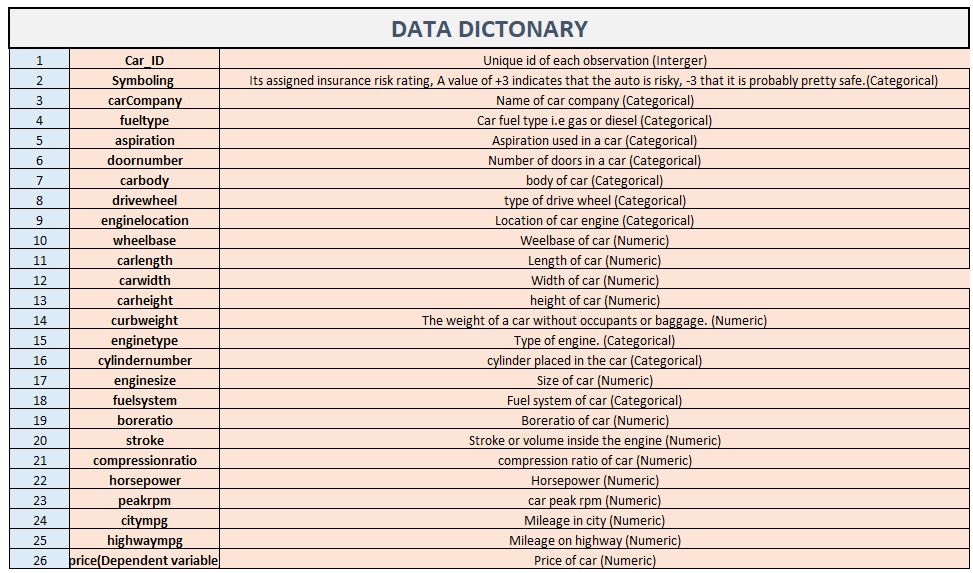

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [76]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### **EDA & Visualization**

In [77]:
df.shape

(205, 26)

In [78]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

<ipython-input-81-808cfb787b08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

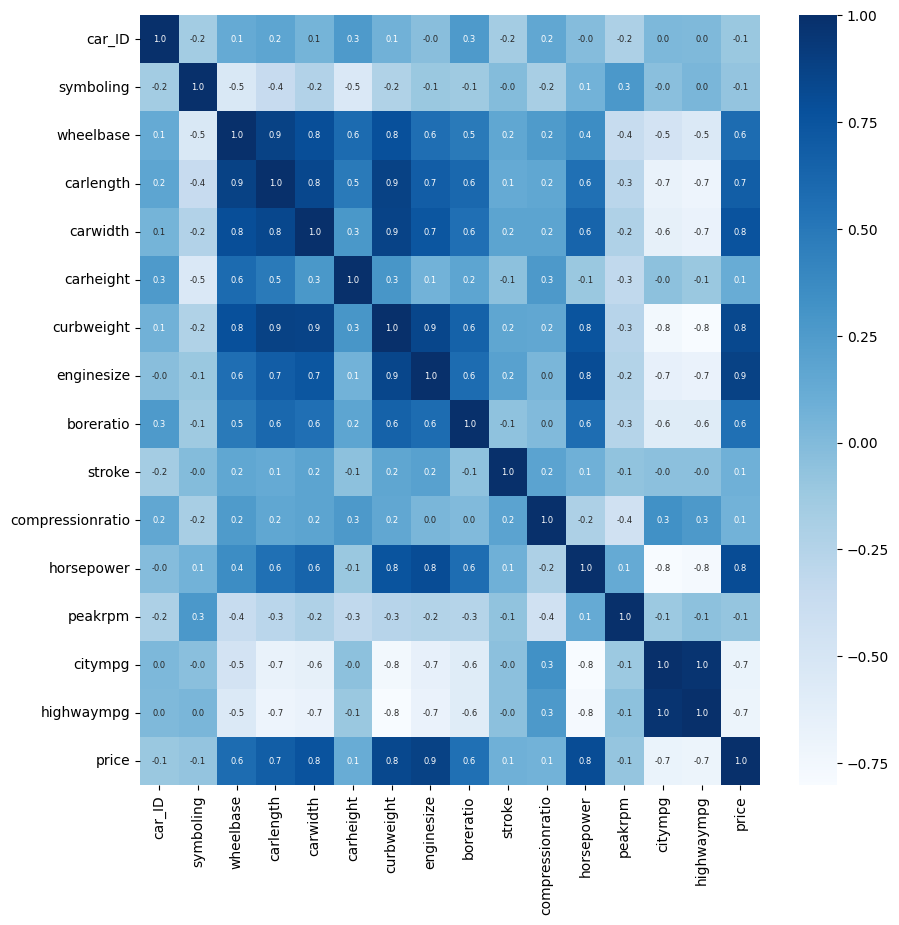

In [81]:
#checking the correlation of the columns
correlation = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=False, fmt = '.1f', annot = True, annot_kws={'size':6}, cmap = 'Blues')

While every variable affects the price, from the heatmap, it is evident that the **enginesize** has the highest positive correlation(0.9) to the price.

This means that there is a very strong linear relationship between the size of the engine and the price of the car. Suggesting that as the enginesize increases, the price of the car tends to increase proportionally.

Text(0.5, 1.0, 'Price vs Engine Size')

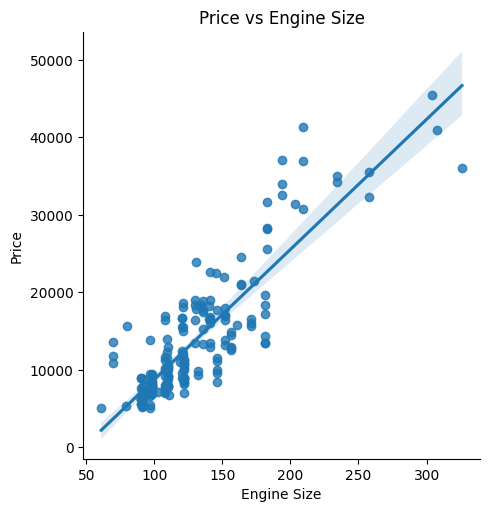

In [82]:
sns.lmplot(x='enginesize', y='price', data= df)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price vs Engine Size')

### **Machine Learning**

#### **Transform data to numeric**

In [83]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [84]:
categorical_columns= ['CarName','fueltype','aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df_encode= pd.get_dummies(data=df, prefix='E', prefix_sep='_', columns=categorical_columns, drop_first= True, dtype= 'int8')
df_encode

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,E_three,E_twelve,E_two,E_2bbl,E_4bbl,E_idi,E_mfi,E_mpfi,E_spdi,E_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [85]:
df_encode.dtypes

car_ID         int64
symboling      int64
wheelbase    float64
carlength    float64
carwidth     float64
              ...   
E_idi           int8
E_mfi           int8
E_mpfi          int8
E_spdi          int8
E_spfi          int8
Length: 191, dtype: object

In [86]:
#features
x=df_encode.drop(['price', 'car_ID'], axis=1)
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,E_three,E_twelve,E_two,E_2bbl,E_4bbl,E_idi,E_mfi,E_mpfi,E_spdi,E_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
#Target
y= df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

#### **Linear Regression**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [89]:
#split the data into train and test
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=23)

In [90]:
x_train.shape

(164, 189)

In [91]:
x_test.shape

(41, 189)

In [92]:
#create the model
linearmodel=LinearRegression()

#fit the model to the training data
linearmodel.fit(x_train, y_train)

LinearRegression()

In [93]:
#make predictions for the test set
y_pred= linearmodel.predict(x_test)

##### **Evaluate the Model**

In [94]:
y_pred= linearmodel.predict(x_test)
y_train_pred= linearmodel.predict(x_train)


In [95]:
from sklearn.metrics import mean_squared_error, r2_score


mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

In [96]:
linearresults= pd.DataFrame(['Linear Regression',mae, mse,r2 ]).transpose()
linearresults.columns=('Method', 'MAE', 'MSE', 'R2')
linearresults

,Method,MAE,MSE,R2
0,Linear Regression,3516.895207,22223069.57036,0.743732


##### **Visualize the actual and predicted prices**

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

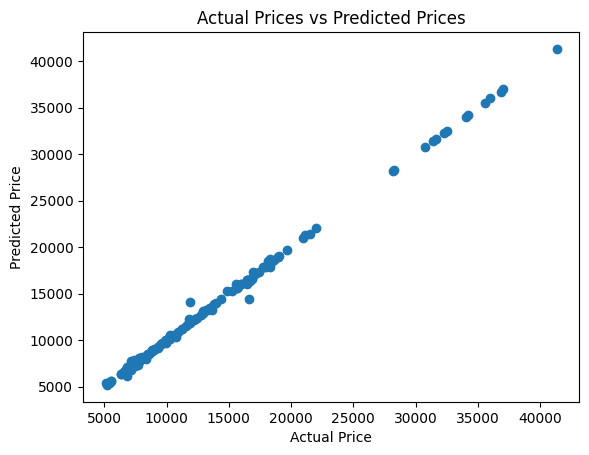

In [97]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

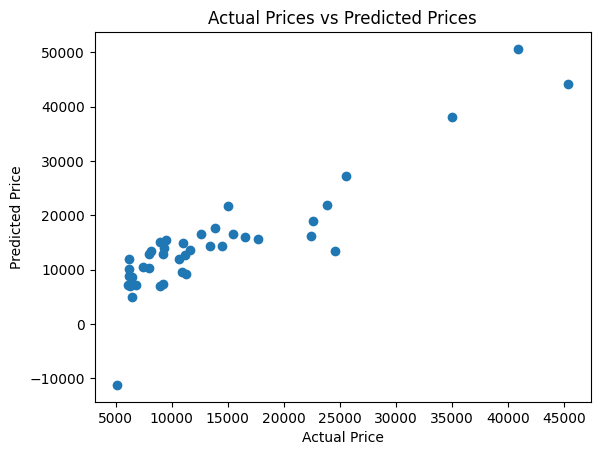

In [98]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

#### **Lasso Regression**

In [99]:
from sklearn.linear_model import Lasso

In [100]:
#split the data into train and test
x_lasso_train, x_lasso_test, y_lasso_train, y_lasso_test= train_test_split(x,y,test_size=0.2, random_state=23)

In [101]:
x_lasso_train.shape

(164, 189)

In [102]:
x_lasso_test.shape

(41, 189)

In [103]:
#create the model
lassomodel=Lasso()

#fit the model to the training data
lassomodel.fit(x_lasso_train, y_lasso_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.012e+07, tolerance: 9.446e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [104]:
#make predictions for the test set
y_lasso_pred= lassomodel.predict(x_lasso_test)

##### **Evaluate the Model**

In [105]:
y_lasso_pred= lassomodel.predict(x_lasso_test)
y_lasso_train_pred= lassomodel.predict(x_lasso_train)


In [106]:
from sklearn.metrics import mean_squared_error, r2_score


lmae= mean_absolute_error(y_lasso_test, y_lasso_pred)
lmse= mean_squared_error(y_lasso_test, y_lasso_pred)
lr2= r2_score(y_lasso_test, y_lasso_pred)

In [107]:
lassoresults= pd.DataFrame(['Lasso Regression',lmae, lmse,lr2 ]).transpose()
lassoresults.columns=('Method', 'MAE', 'MSE', 'R2')
lassoresults

,Method,MAE,MSE,R2
0,Lasso Regression,2351.396106,12006277.858113,0.861548


##### **Visualize the actual and predicted prices**

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

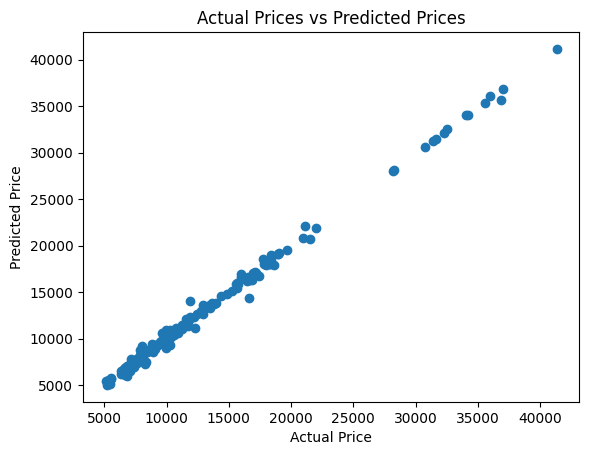

In [108]:
plt.scatter(y_lasso_train, y_lasso_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

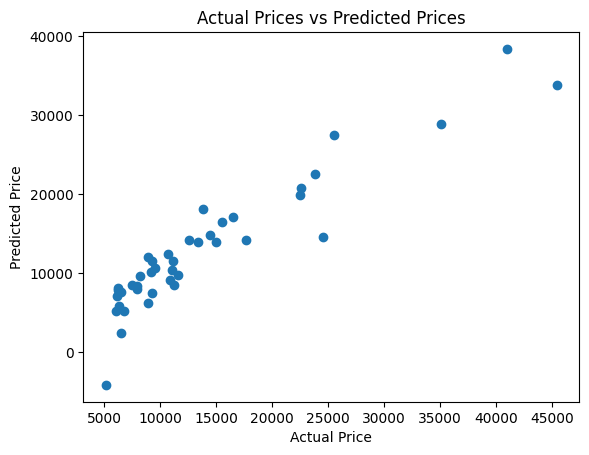

In [109]:
plt.scatter(y_lasso_test, y_lasso_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

#### **Model Comparison**

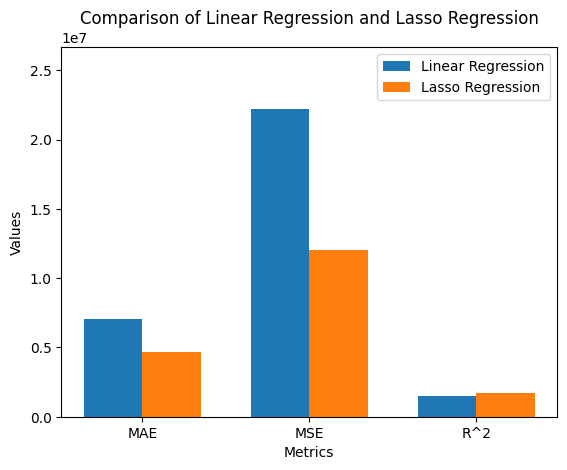

In [114]:
# Your metrics and values
metrics = ['MAE', 'MSE', 'R^2']
linear_regression_values = [linear_regression_metrics[metric] for metric in metrics]
lasso_regression_values = [lasso_regression_metrics[metric] for metric in metrics]

# Adjusting the values of MAE and R^2 for better visualization
multiplier_mae_mse = 2000  # Adjust as needed for MAE and MSE
multiplier_r2 = 2000000 # Adjust as needed for R^2
adjusted_linear_regression_values = [val * multiplier_mae_mse if metric in ['MAE'] else val * multiplier_r2 if metric == 'R^2' else val for val, metric in zip(linear_regression_values, metrics)]
adjusted_lasso_regression_values = [val * multiplier_mae_mse if metric in ['MAE'] else val * multiplier_r2 if metric == 'R^2' else val for val, metric in zip(lasso_regression_values, metrics)]



# Plotting
bar_width = 0.35
index = range(len(metrics))

fig, ax = plt.subplots()
bar1 = ax.bar(index, adjusted_linear_regression_values, bar_width, label='Linear Regression')
bar2 = ax.bar([i + bar_width for i in index], adjusted_lasso_regression_values, bar_width, label='Lasso Regression')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Linear Regression and Lasso Regression')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Adjusting the y-axis scale to fit all metrics
max_value = max(max(adjusted_linear_regression_values), max(adjusted_lasso_regression_values))
ax.set_ylim(0, max_value * 1.2)  # Adjust multiplier as needed

plt.show()


In [111]:
linear_regression_metrics = {'MAE': mae, 'MSE': mse, 'R^2': r2}
lasso_regression_metrics = {'MAE': lmae, 'MSE': lmse, 'R^2': lr2}

# Print linear regression metrics
print("Linear Regression Metrics:")
print("MAE:", linear_regression_metrics['MAE'])
print("MSE:", linear_regression_metrics['MSE'])
print("R^2:", linear_regression_metrics['R^2'])

# Print Lasso regression metrics
print("\nLasso Regression Metrics:")
print("MAE:", lasso_regression_metrics['MAE'])
print("MSE:", lasso_regression_metrics['MSE'])
print("R^2:", lasso_regression_metrics['R^2'])

# Compare the metrics
print("\nComparison:")
if linear_regression_metrics['MAE'] < lasso_regression_metrics['MAE']:
    print("Linear Regression has lower MAE, indicating better performance.")
else:
    print("Lasso Regression has lower MAE, indicating better performance.")

if linear_regression_metrics['MSE'] < lasso_regression_metrics['MSE']:
    print("Linear Regression has lower MSE, indicating better performance.")
else:
    print("Lasso Regression has lower MSE, indicating better performance.")

if linear_regression_metrics['R^2'] > lasso_regression_metrics['R^2']:
    print("Linear Regression has higher R^2, indicating better performance.")
else:
    print("Lasso Regression has higher R^2, indicating better performance.")


Linear Regression Metrics:
MAE: 3516.895207424484
MSE: 22223069.57035951
R^2: 0.7437317929709537

Lasso Regression Metrics:
MAE: 2351.396105760009
MSE: 12006277.858113093
R^2: 0.8615480507744544

Comparison:
Lasso Regression has lower MAE, indicating better performance.
Lasso Regression has lower MSE, indicating better performance.
Lasso Regression has higher R^2, indicating better performance.


Lasso Regression is therefore the most suitable model to predict the car prices.

#### **Predicting an instance in the dataset**

In [115]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,E_three,E_twelve,E_two,E_2bbl,E_4bbl,E_idi,E_mfi,E_mpfi,E_spdi,E_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
x.iloc[10]

symboling      2.0
wheelbase    101.2
carlength    176.8
carwidth      64.8
carheight     54.3
             ...  
E_idi          0.0
E_mfi          0.0
E_mpfi         1.0
E_spdi         0.0
E_spfi         0.0
Name: 10, Length: 189, dtype: float64

In [117]:
input_data = (x.iloc[10])

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lassomodel.predict(input_data_reshaped)
print('The Predicted Price of the Car is:',prediction)

The Predicted Price of the Car is: [16156.51632271]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
